# Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [51]:
data = pd.read_csv('Cleaned_wines_SPA.csv')
data.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [52]:
print(data.shape)
data.info()

(2048, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2048 non-null   int64  
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         2048 non-null   object 
 9   body         2048 non-null   float64
 10  acidity      2048 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 176.1+ KB


## Visualize outliers using box plots 

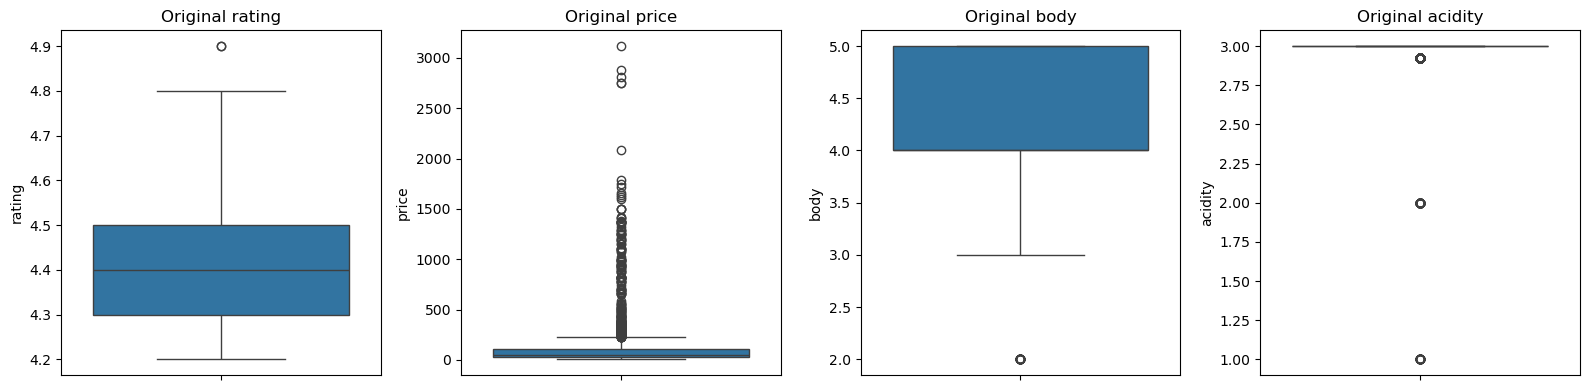

In [53]:
cols = ['rating', 'price', 'body', 'acidity']

fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(16, 4))
for i, col in enumerate(cols):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f'Original {col}')
plt.tight_layout()
plt.show()

## Removing outliers from datasets Using IQR method

In [54]:
cols = ['rating', 'price', 'body', 'acidity']

mask = pd.Series(True, index=data.index)

for col in cols:
    lower_bound = data[col].quantile(0.25)
    upper_bound = data[col].quantile(0.75)
    mask &= data[col].between(lower_bound, upper_bound)

data = data[mask]

## Visualize outliers using box plots after cleaning

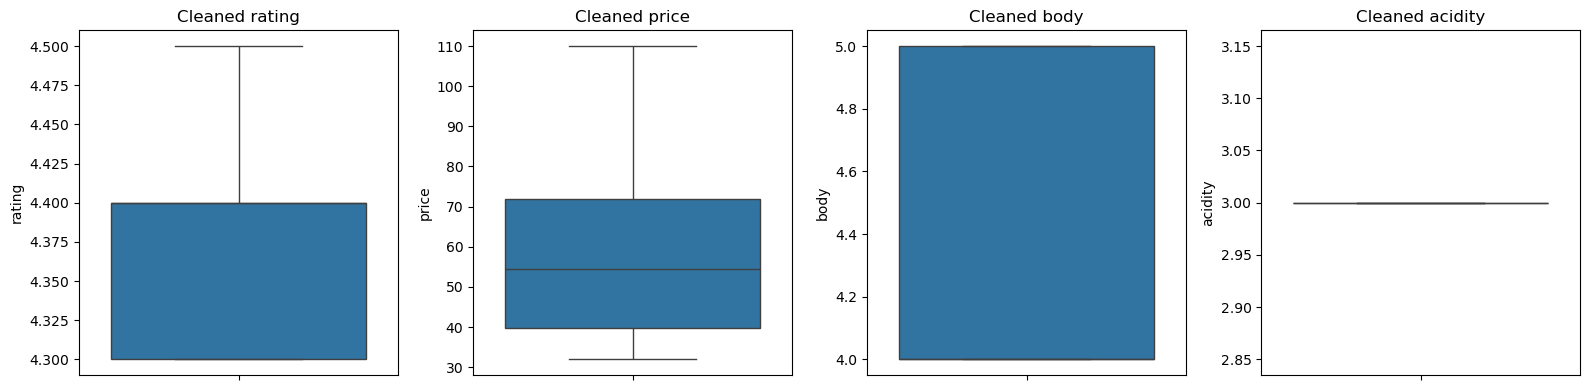

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(16, 4))
for i, col in enumerate(cols):
    sns.boxplot(y=data_cleaned[col], ax=axes[i])
    axes[i].set_title(f'Cleaned {col}')
plt.tight_layout()
plt.show()

In [56]:
print(data.shape)
data.info()

(634, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 350 to 1818
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       634 non-null    object 
 1   wine         634 non-null    object 
 2   year         634 non-null    int64  
 3   rating       634 non-null    float64
 4   num_reviews  634 non-null    int64  
 5   country      634 non-null    object 
 6   region       634 non-null    object 
 7   price        634 non-null    float64
 8   type         634 non-null    object 
 9   body         634 non-null    float64
 10  acidity      634 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 59.4+ KB


In [57]:
data.to_csv('More_Cleaned_wines_SPA.csv', index=False)